In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Generate data (2 features example)

x_min = 0
x_max = 1000
N = 1000

x1 = np.random.uniform(x_min, x_max, size=N)
x2 = np.random.uniform(x_min, x_max, size=N)

X = np.column_stack((x1, x2)) # create (N * 2) array
y = 2*X[:,0] + X[:,1] + 5 + 200*np.random.randn(N)


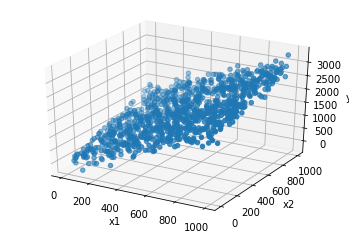

In [9]:
# Plot data

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.scatter3D(x1, x2, y)

plt.show()

**How to find the line of best fit?**

Now $x_i$ contains multiple features so $\hat{y}_i$ will be given by

$\hat{y}_i = w_0 + w_1 x_{i1} + ... + w_D x_{iD} = w^{T}x_i$

where D is number of features.

In matrix form

$\hat{y}_{N\times 1} = X_{N \times D} w_{D \times 1}$

where N is the number of samples.
\begin{align}
\begin{bmatrix}
y_1\\
.\\
.\\
.\\
y_N 
\end{bmatrix}
=
\begin{bmatrix}
x_{11}&.&.&.&x_{1D}\\
.&.&.&.&.\\
.&.&.&.&.\\
.&.&.&.&.\\
x_{N1}&.&.&.&x_{ND}
\end{bmatrix}
\begin{bmatrix}
w_1\\
.\\
.\\
.\\
w_D 
\end{bmatrix}
\end{align}

we want to minimize the cost function (mean squared error)

$E = \frac{1}{N}\sum_i(y_i - \hat{y}_i)^2 = \frac{1}{N}\sum_i(y_i - w^{T}x_i)^2$


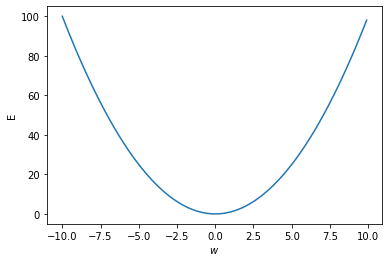

#### 1. **Calculating analytical solution with NumPy**

We can find the exact solution by solving

$\frac{\partial E}{\partial w_j} = \sum_i 2(y_i - w^T x_{ij})(-x_{ij}) = 0,\;\;\; j=1,...,D$

...obtaining

$w = (X^T X)^{-1} X^T y$

In [10]:
# Numpy has a special function to solve linear equations
# Ax = b --> x = np.linalg.solve(A, b)

w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))

In [11]:
# predict the result for (x1=5, x2=50)
np.array([[50, 50]]).dot(w)

array([150.90814785])

In [12]:
y_pred = X.dot(w)
y_pred[:5]

array([2209.65846602,  860.99902684, 1320.24000307, 1997.74334649,
       1444.11918605])

In [13]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9119523909298921

#### 2. **Using Scikit-Learn**

In [14]:
from sklearn.linear_model import LinearRegression

# train the linear model
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [15]:
# calculate R^2
reg.score(X, y)

0.9119703651042613

In [16]:
y_pred = reg.predict(X)
y_pred[:5]

array([2209.19004432,  865.11999975, 1321.61146268, 1997.92539962,
       1446.4274436 ])

In [17]:
r2_score(y, y_pred)

0.9119703651042613

#### 3. **Using statsmodels**

In [18]:
import statsmodels.api as sm

X1 = sm.add_constant(X)
results = sm.OLS(y,X1).fit()

results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     5164.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:56:28   Log-Likelihood:                -6726.9
No. Observations:                1000   AIC:                         1.346e+04
Df Residuals:                     997   BIC:                         1.347e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7201     17.111      0.451      0.652     -25.857      41.297
x1             2.0125      0.022     90.593      0.000       1.969       2.056
x2             0.9925      0.022     44.357      0.000       0.949       1.036
==============================================================================
Omnibus:                        1.308   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.520   Jarque-Bera (JB):                1.216
Skew:                          -0.005   Prob(JB):                        0.544
Kurtosis:                       3.170   Cond. No.                     2.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
y_pred = results.predict(X1)
y_pred[:5]

array([2209.19004432,  865.11999975, 1321.61146268, 1997.92539962,
       1446.4274436 ])

In [20]:
r2_score(y, y_pred)

0.9119703651042613

##### **Adding a new (random) feature...**

In [21]:
X.shape

(1000, 2)

In [22]:
random_column = np.random.choice([20, 30, 40], size=len(X)).reshape(-1,1)

In [23]:
random_column.shape

(1000, 1)

In [24]:
X = np.hstack((X, random_column.reshape(-1,1)))

In [25]:
X[:5]

array([[940.24953641, 311.49606851,  30.        ],
       [304.81000893, 245.78778538,  40.        ],
       [342.3198657 , 629.65034661,  40.        ],
       [829.75320982, 322.69388653,  20.        ],
       [605.41917471, 221.927455  ,  30.        ]])

In [26]:
X1 = sm.add_constant(X)
results = sm.OLS(y,X1).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     3440.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:56:28   Log-Likelihood:                -6726.8
No. Observations:                1000   AIC:                         1.346e+04
Df Residuals:                     996   BIC:                         1.348e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5079     28.798      0.643      0.521     -38.005      75.020
x1             2.0126      0.022     90.558      0.000       1.969       2.056
x2             0.9931      0.022     44.306      0.000       0.949       1.037
x3            -0.3680      0.790     -0.466      0.641      -1.918       1.182
==============================================================================
Omnibus:                        1.252   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                1.154
Skew:                          -0.006   Prob(JB):                        0.562
Kurtosis:                       3.166   Cond. No.                     3.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""